<a href="https://colab.research.google.com/github/dicorzki/BDDM/blob/main/22_11_4656_UAS_BDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bentuk Dataset: (303, 14)
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Nilai Hilang:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca   

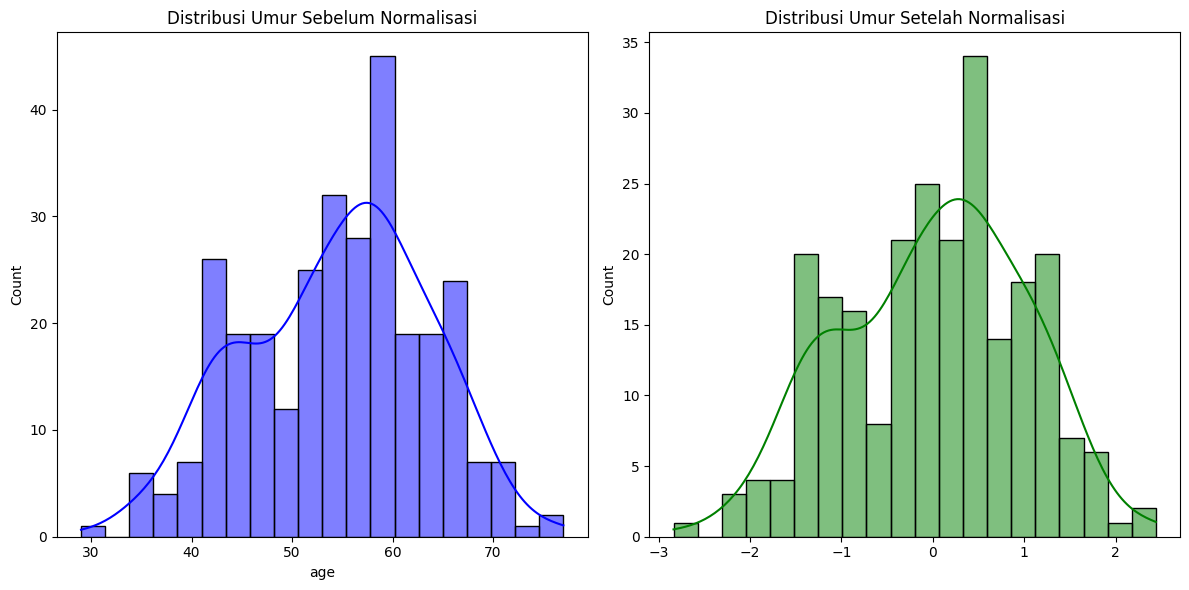


Statistik Dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std    

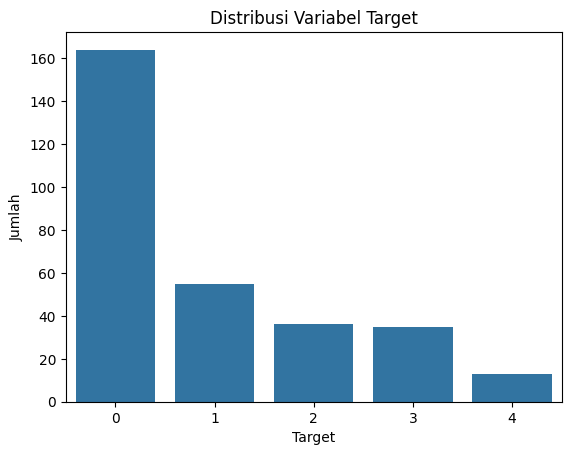

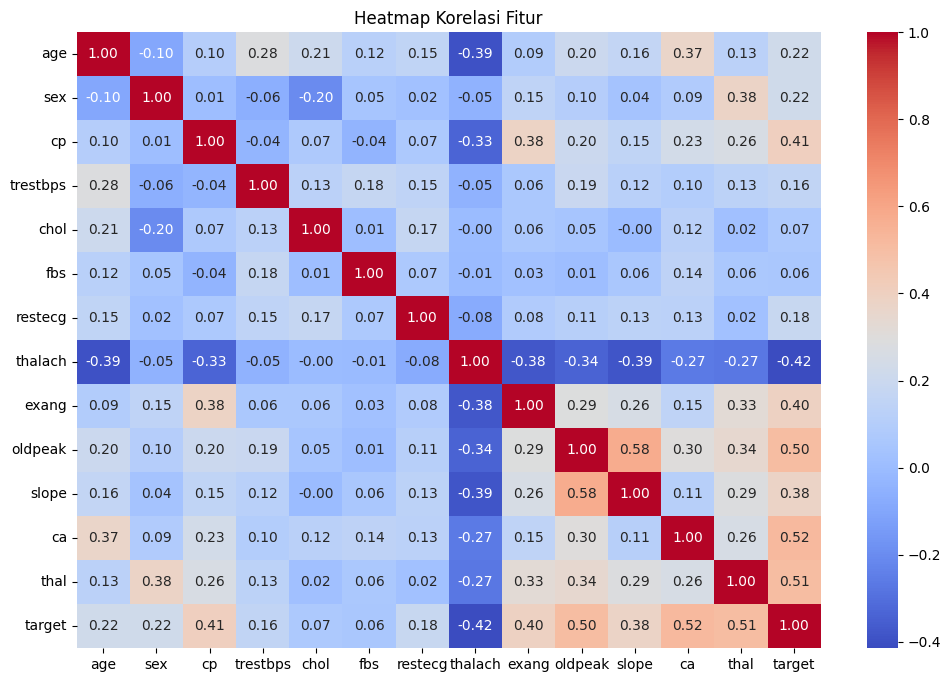

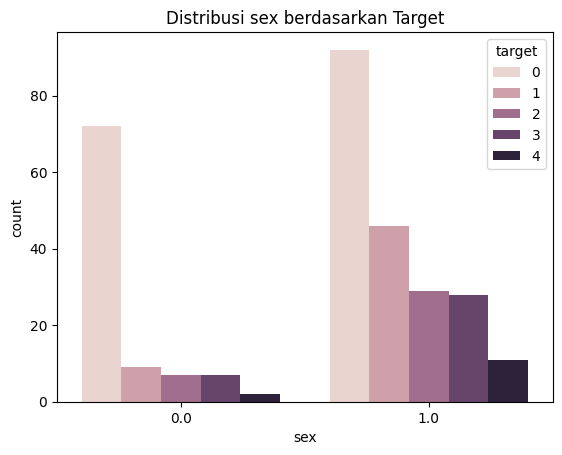

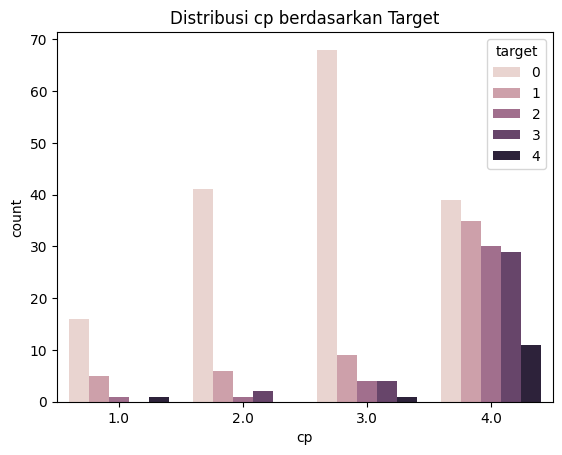

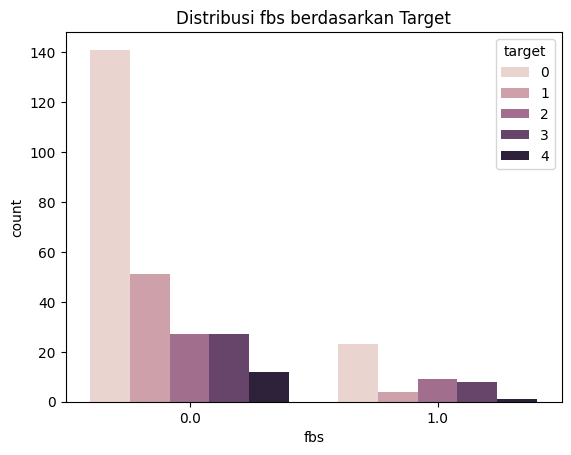

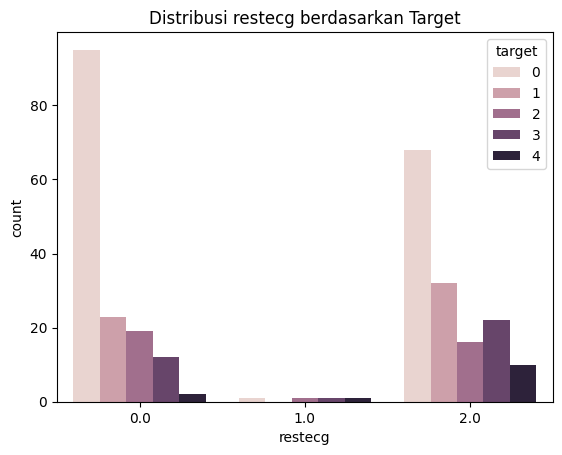

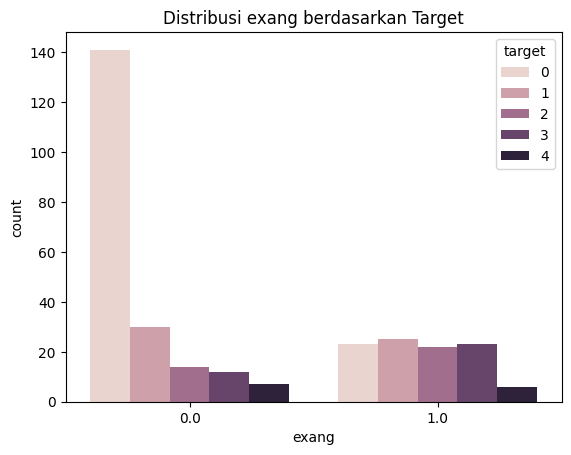

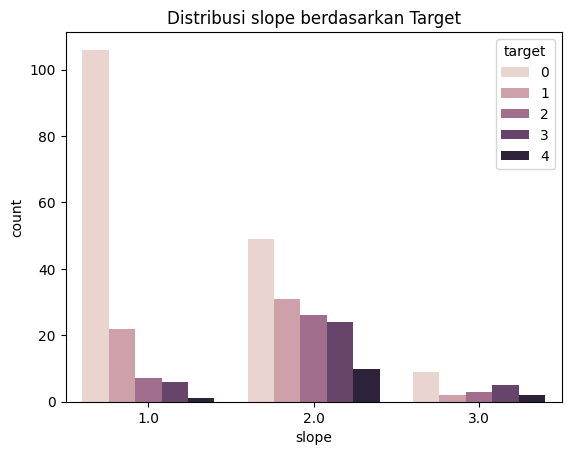

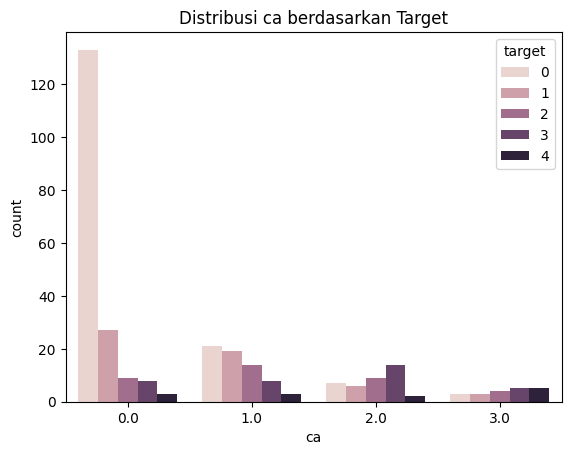

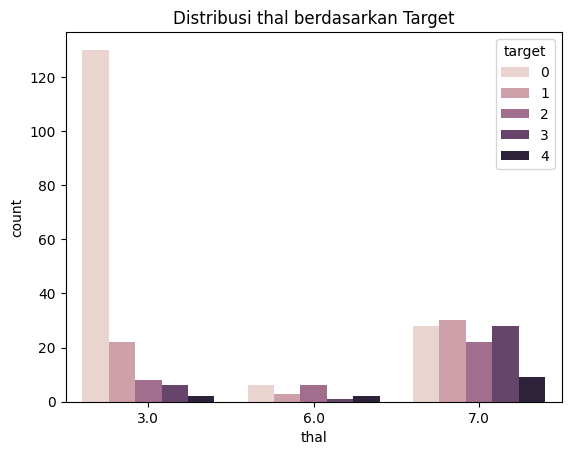


Feature importance:
     Feature  Importance
7    thalach    0.141882
9    oldpeak    0.122816
4       chol    0.112325
0        age    0.111226
11        ca    0.094464
3   trestbps    0.092410
2         cp    0.083707
12      thal    0.067897
10     slope    0.047447
8      exang    0.042062
1        sex    0.033037
6    restecg    0.029260
5        fbs    0.021467


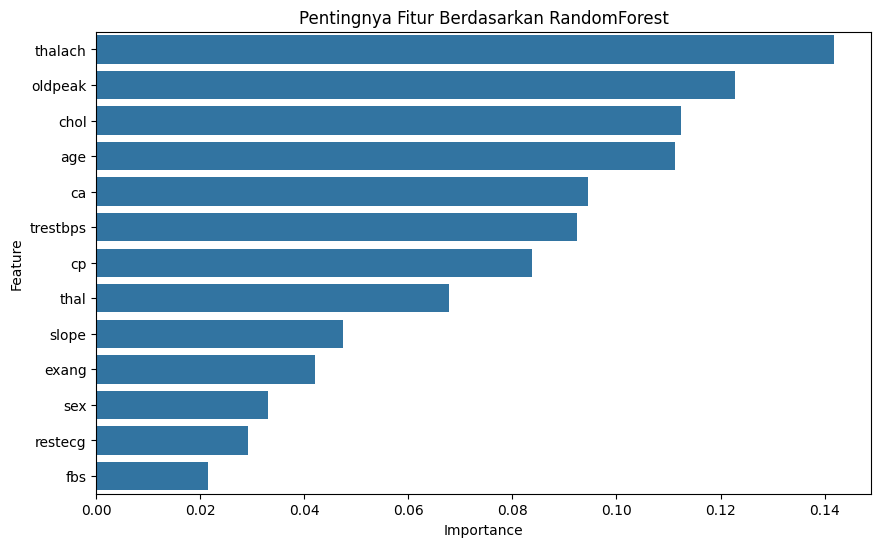


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.17      0.11      0.13         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.39      0.49      0.43        61


Confusion matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


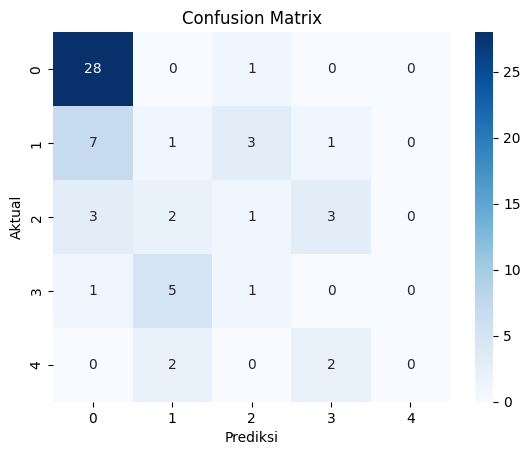

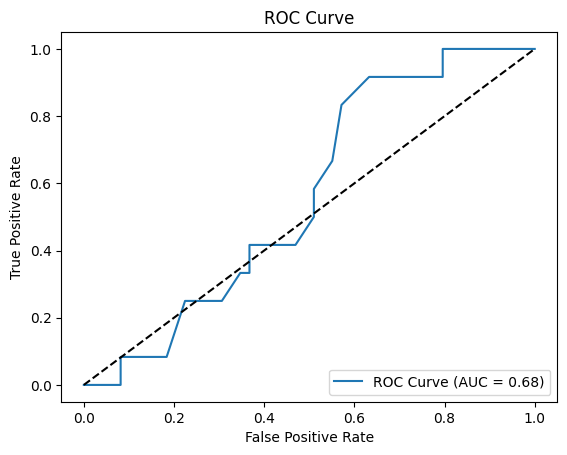


Akurasi: 0.4918032786885246

Analisis dan Diskusi:
Model memiliki akurasi yang cukup, tetapi masih ada ruang untuk peningkatan. Hyperparameter tuning atau penggunaan model lain dapat dieksplorasi.
ROC-AUC menunjukkan nilai 0.68, yang menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# URL Dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nama kolom untuk dataset
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load dataset
data = pd.read_csv(data_url, names=columns, na_values="?")

# --- PROFIL DATA ---
# Tampilkan informasi dasar
print("Bentuk Dataset:", data.shape)
print("Informasi Dataset:")
data.info()

# Menangani nilai yang hilang
print("\nNilai Hilang:")
print(data.isnull().sum())

# Imputasi nilai yang hilang (menggunakan median untuk nilai numerik)
data = data.fillna(data.median())

# Statistik Deskriptif
print("\nStatistik Deskriptif:\n", data.describe())

# --- PRE-PROCESSING DATA ---
# Pisahkan fitur dan target
X = data.drop("target", axis=1)
y = data["target"]

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualisasi distribusi fitur sebelum dan sesudah normalisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X["age"], kde=True, bins=20, color="blue")
plt.title("Distribusi Umur Sebelum Normalisasi")
plt.subplot(1, 2, 2)
sns.histplot(X_train[:, 0], kde=True, bins=20, color="green")
plt.title("Distribusi Umur Setelah Normalisasi")
plt.tight_layout()
plt.show()

# --- EXPLORATORY DATA ANALYSIS ---
# Statistik dasar
print("\nStatistik Dataset:")
print(data.describe())

# Visualisasi Distribusi Target
sns.countplot(x="target", data=data)
plt.title("Distribusi Variabel Target")
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.show()

# Visualisasi Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Visualisasi distribusi categorical features
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
for feature in categorical_features:
    sns.countplot(x=feature, data=data, hue="target")
    plt.title(f"Distribusi {feature} berdasarkan Target")
    plt.show()

# --- SELEKSI FITUR ---
# Menggunakan RandomForest untuk pentingnya fitur
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("\nFeature importance:")
print(feature_importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Pentingnya Fitur Berdasarkan RandomForest")
plt.show()

# --- PEMODELAN ---
# Melatih RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --- EVALUASI MODEL ---
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrik evaluasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ROC-AUC
y_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovo')
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1],pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi:", accuracy)

# --- ANALISIS DAN DISKUSI ---
print("\nAnalisis dan Diskusi:")
if accuracy < 0.85:
    print("Model memiliki akurasi yang cukup, tetapi masih ada ruang untuk peningkatan. Hyperparameter tuning atau penggunaan model lain dapat dieksplorasi.")
else:
    print("Model memiliki performa yang baik dengan akurasi yang memadai.")
print(f"ROC-AUC menunjukkan nilai {roc_auc:.2f}, yang menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.")
